In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

df = pd.read_csv('niceguys.csv')


In [50]:
#head
#checks the first 5 records of the dataset
df.head()

,number_siblings,name,sex,age,living allowance,Are_you_a,How_many_time_do_eat_food,Unnamed: 7,do_you_have_aboyfriend/girlfriend
0,1,Nakasujja Gertrude,female,33,NaN,Data Scientist,2,NaN,1
1,3,Arinda Asiimwe Atweta,female,23,"50,000",Machine Learning Enginer,1,NaN,1
2,4,Ndjekornom Victoire,male,23,25000,Data Scientist,1,NaN,0
3,0,KATURAMU EDGAR,male,27,500000,Machine Learning Enginer,2,NaN,0
4,4,Abinsinguza Lasse,male,24,sh:100000,Data Scientist,2,NaN,1


In [51]:
#tail
#checks the last 5 records of the dataset
df.tail()

,number_siblings,name,sex,age,living allowance,Are_you_a,How_many_time_do_eat_food,Unnamed: 7,do_you_have_aboyfriend/girlfriend
30,2,Rwakasiisi Edwin,male,24,150000,Data Scientist,3,NaN,1
31,5,Ampumuza Aijuka,female,23,500000 per semester,Data Scientist,2,NaN,0
32,5,TUKWASIIBWE MARTIN,male,23,200000,Data Analyst,2,NaN,0
33,8,Olowo Omondi Philly,male,23,NaN,Data Scientist,2,NaN,1
34,4,Kisembo Rodgers Bangirana,male,23,300000,Data Analyst,3,NaN,0


In [52]:
#sanity check of the dataset
#shape- checking the number of records in the dataset ie rows and columns ie(rows, columns)
df.shape

(35, 9)

In [53]:
#info which gives information like data types, column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   number_siblings                    35 non-null     int64  
 1   name                               35 non-null     object 
 2   sex                                35 non-null     object 
 3   age                                35 non-null     int64  
 4   living allowance                   32 non-null     object 
 5   Are_you_a                          35 non-null     object 
 6   How_many_time_do_eat_food          35 non-null     int64  
 7   Unnamed: 7                         0 non-null      float64
 8   do_you_have_aboyfriend/girlfriend  35 non-null     int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 2.6+ KB


In [54]:
#finding the missing value
df.isnull().sum()

number_siblings                       0
name                                  0
sex                                   0
age                                   0
living allowance                      3
Are_you_a                             0
How_many_time_do_eat_food             0
Unnamed: 7                           35
do_you_have_aboyfriend/girlfriend     0
dtype: int64

In [55]:
#finding the percentage of missing value
df.isnull().sum()/df.shape[0]*100

number_siblings                        0.000000
name                                   0.000000
sex                                    0.000000
age                                    0.000000
living allowance                       8.571429
Are_you_a                              0.000000
How_many_time_do_eat_food              0.000000
Unnamed: 7                           100.000000
do_you_have_aboyfriend/girlfriend      0.000000
dtype: float64

In [56]:
# finding duplicates
df.duplicated().sum()

0

In [57]:
# identifying the garbage value and the garbage value is always in form of object
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("***"*10) 

name
Nakasujja Gertrude           1
Harlan                       1
Yapyeko Rebecca              1
NKETAMUKAMA TARASISIO        1
Ampaire Stacey Nuwagaba      1
Ahaabwe Derrick              1
Ssentongo Henry              1
 Shadia                      1
AMADILE MAJID                1
David Hope                   1
Nankya Elsa                  1
Asiimire Patricia            1
Rwakasiisi Edwin             1
Ampumuza Aijuka              1
TUKWASIIBWE MARTIN           1
Olowo Omondi Philly          1
ntegeka k pius               1
Efrata Aron                  1
Arinda Asiimwe Atweta        1
Nakanwagu Vanesa             1
Ndjekornom Victoire          1
KATURAMU EDGAR               1
Abinsinguza Lasse            1
Beingana Jim Junior          1
Cyiza Ndoli Jean de Dieu     1
MUSIIMENTA CISSYLYN          1
Otim Ronald                  1
Lutalo Allan                 1
Levi Aine                    1
NASAAZI TAKIA                1
Alvin                        1
MULINDWA YUSUF               1
Hil

In [58]:
#descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
number_siblings,35.0,3.914286,2.536457,0.0,2.0,4.0,5.0,9.0
age,35.0,23.914286,2.852980,20.0,22.5,23.0,24.0,33.0
How_many_time_do_eat_food,35.0,2.314286,0.676123,1.0,2.0,2.0,3.0,3.0
Unnamed: 7,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
do_you_have_aboyfriend/girlfriend,35.0,0.314286,0.471008,0.0,0.0,0.0,1.0,1.0


In [59]:
df.describe(include="object")

,name,sex,living allowance,Are_you_a
count,35,35,32,35
unique,35,2,25,3
top,Nakasujja Gertrude,male,200000,Data Scientist
freq,1,23,3,19


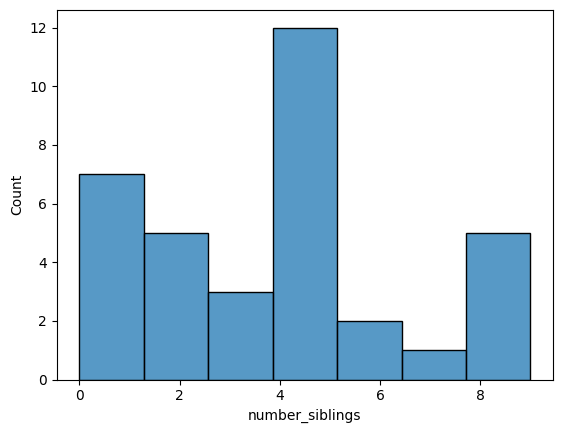

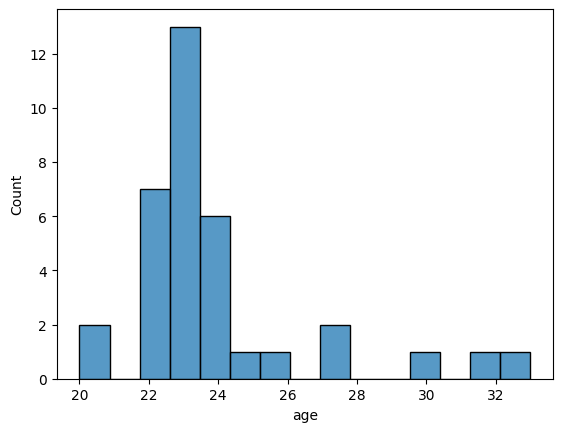

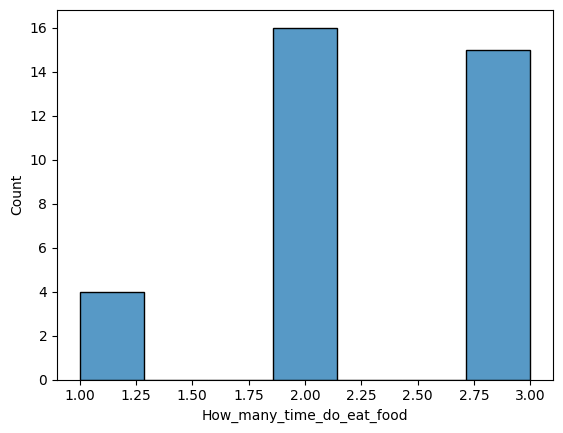

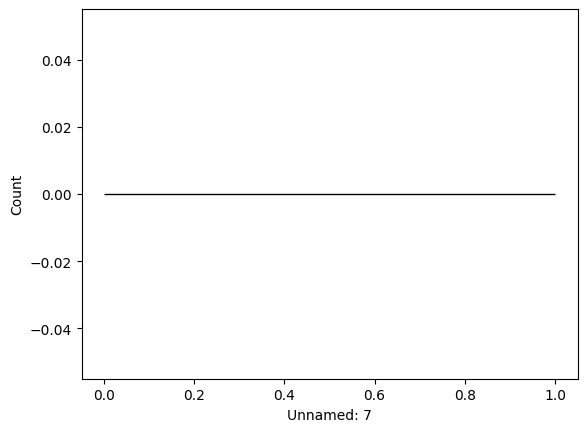

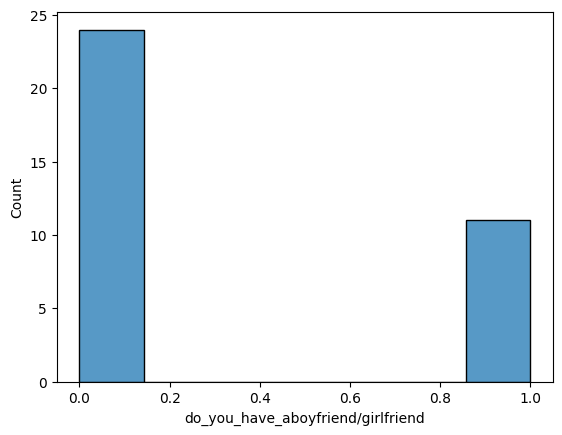

In [60]:
#Histogram to show distribution of data
import warnings
warnings.filterwarnings("ignore")
for i in df.select_dtypes(include="number").columns:
    sbn.histplot(data=df,x=i)
    plt.show()

In [61]:
#  Getting the number of columns
df.select_dtypes(include="number").columns

Index(['number_siblings', 'age', 'How_many_time_do_eat_food', 'Unnamed: 7',
       'do_you_have_aboyfriend/girlfriend'],
      dtype='object')

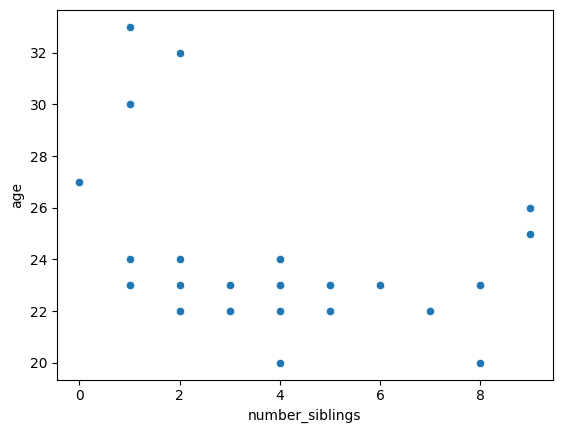

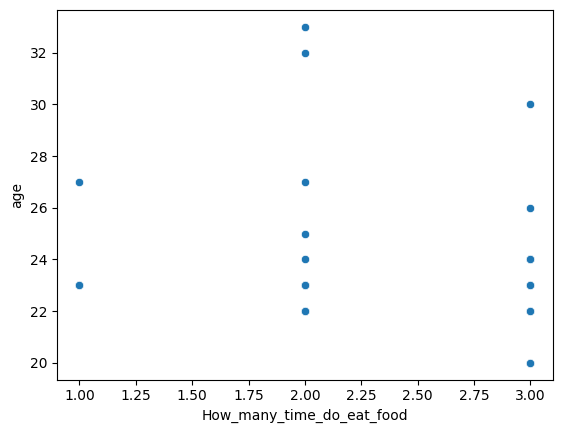

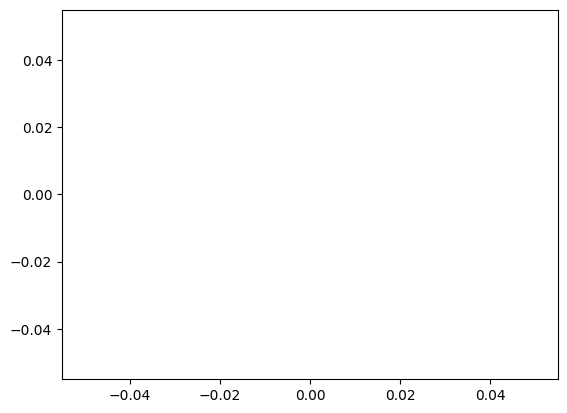

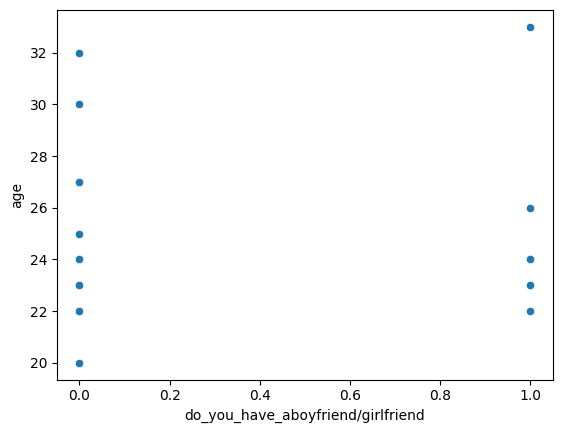

In [62]:
# scatter plot to understand the relationship
for i in ['number_siblings', 'How_many_time_do_eat_food', 'Unnamed: 7',
        'do_you_have_aboyfriend/girlfriend']:
    sbn.scatterplot(data=df, x=i, y="age")
    plt.show()
    

In [63]:
#correlation with heatmap to interprete the relation and multicolliniarity
#plt.figure(figsize(15,15))
s=df.select_dtypes(include="number"). corr()

<Axes: >

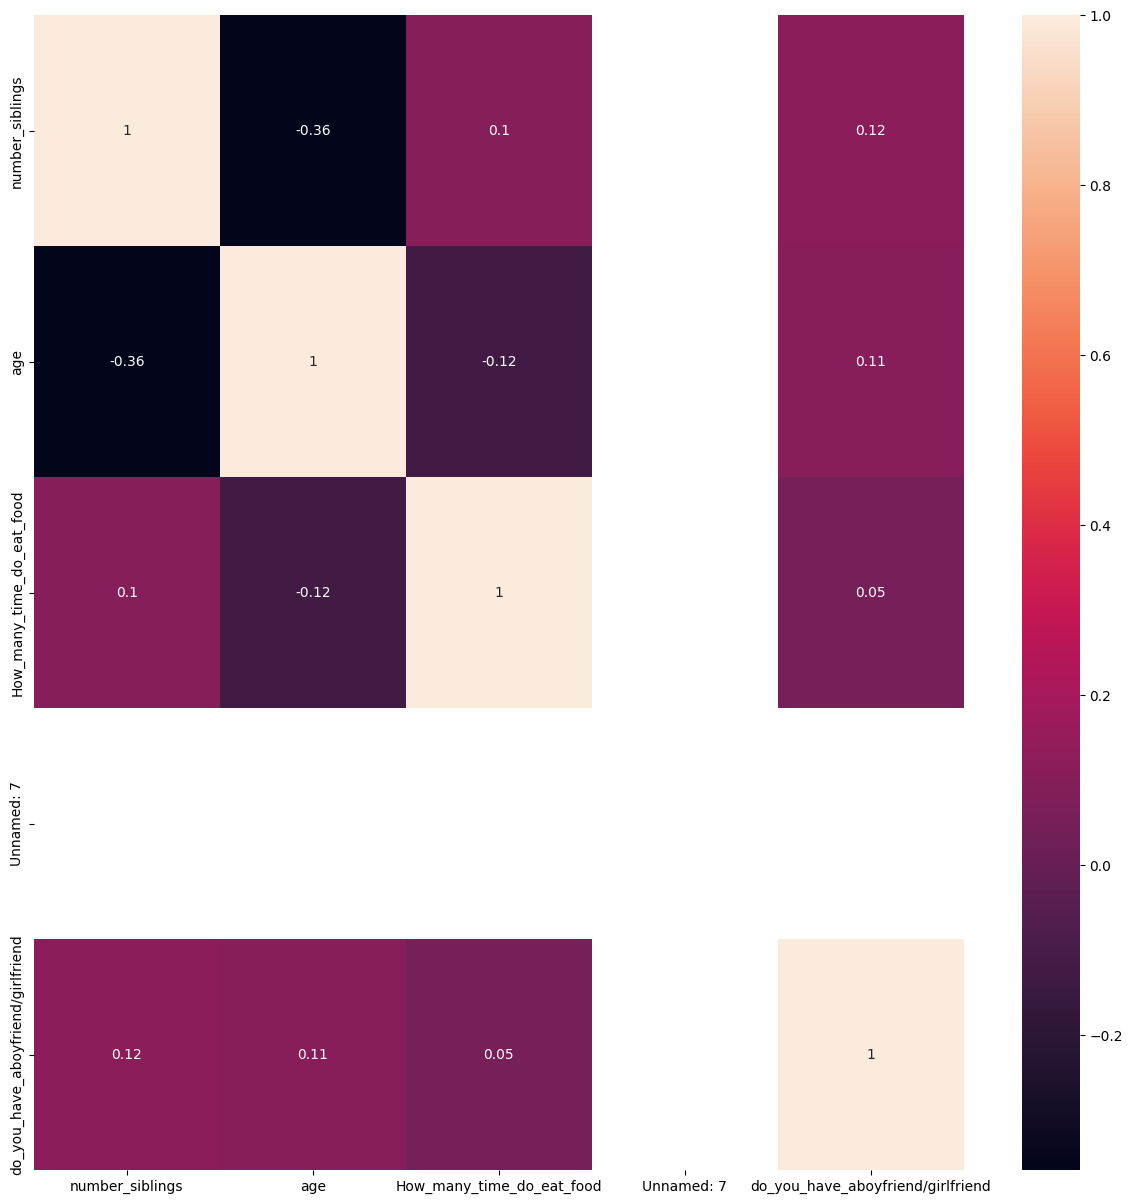

In [64]:
plt.figure(figsize=(15,15))
sbn.heatmap(s, annot=True)

In [65]:
#missing value treatment 
#like mean, median, mode or KNNIputer
#for discrete or categorical data, fill it with mode
#for numerical column, fill it with median or the mean
df.isnull().sum()

number_siblings                       0
name                                  0
sex                                   0
age                                   0
living allowance                      3
Are_you_a                             0
How_many_time_do_eat_food             0
Unnamed: 7                           35
do_you_have_aboyfriend/girlfriend     0
dtype: int64

In [66]:
from sklearn.impute import KNNImputer
impute = KNNImputer()

In [67]:
for i in df.select_dtypes(include="number").columns:
    df[i]=impute.fit_transform(df[[i]])

In [68]:
#Distribution of bf and gf count
df['age'].value_counts()


age
23.0    13
22.0     7
24.0     6
27.0     2
20.0     2
33.0     1
25.0     1
32.0     1
26.0     1
30.0     1
Name: count, dtype: int64

In [69]:
#Distribution of number of siblings
df['number_siblings'].value_counts()

number_siblings
4.0    8
1.0    5
2.0    5
5.0    4
3.0    3
8.0    3
0.0    2
6.0    2
9.0    2
7.0    1
Name: count, dtype: int64

In [70]:
df.columns

Index(['number_siblings', 'name', 'sex', 'age', 'living allowance',
       'Are_you_a', 'How_many_time_do_eat_food', 'Unnamed: 7',
       'do_you_have_aboyfriend/girlfriend'],
      dtype='object')

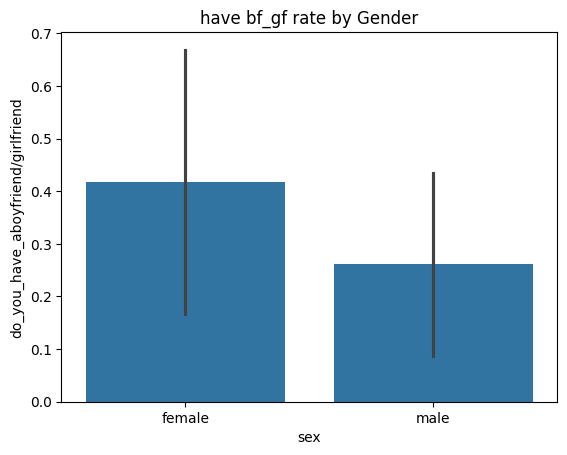

In [73]:
#Data visualization to gain insight from the data
#have bf_gf rate by gender
sbn.barplot(x='sex', y='do_you_have_aboyfriend/girlfriend', data=df)
plt.title('have bf_gf rate by Gender')
plt.show()

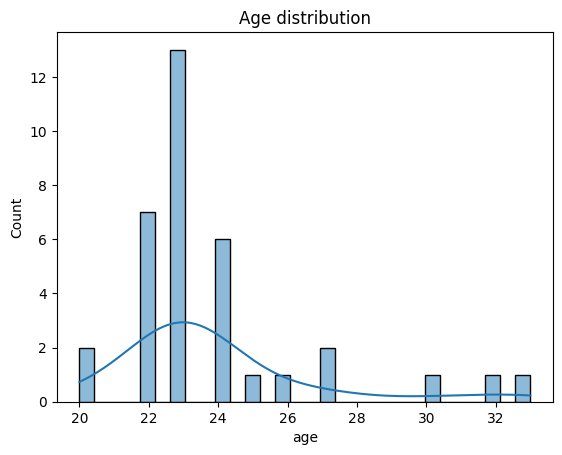

In [74]:
#Age distribution
sbn.histplot(df['age'], bins=30, kde=True)
plt.title('Age distribution')
plt.show()


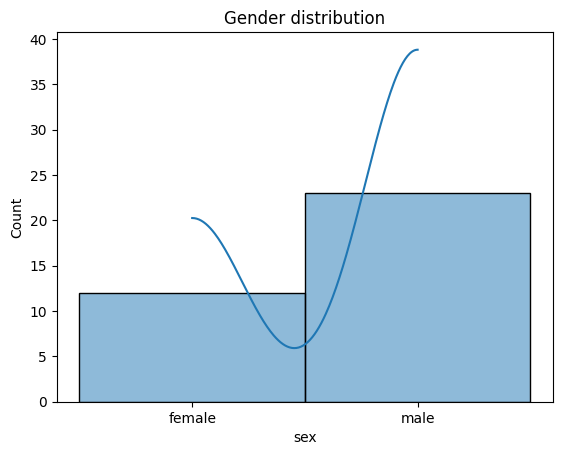

In [75]:
#Gender distribution
sbn.histplot(df['sex'], bins=30, kde=True)
plt.title('Gender distribution')
plt.show()

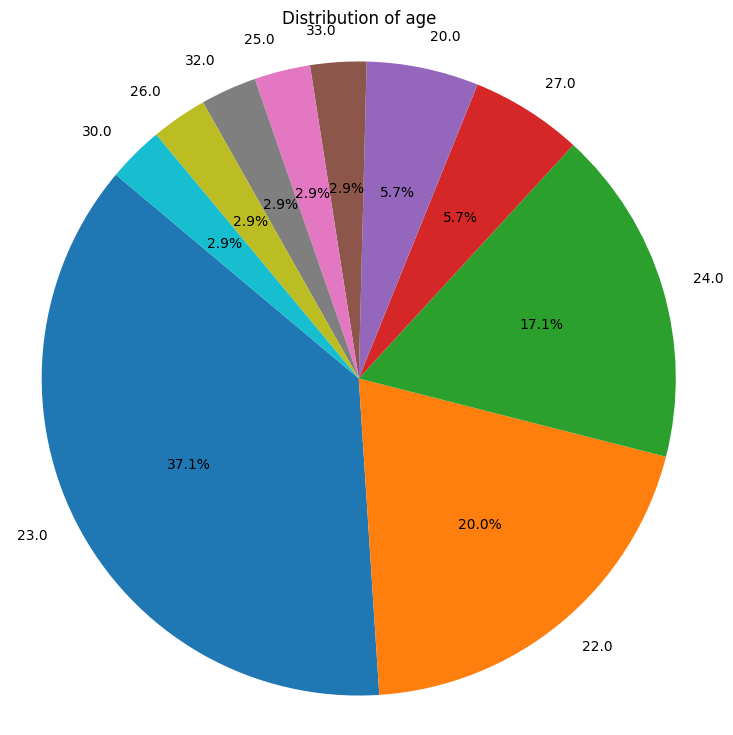

In [79]:
#Use pie chart for age distribution
age_counts=df['age'].value_counts()
#create the pie chart
plt.figure(figsize=(9,9))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=140 )
plt.title('Distribution of age')
plt.axis('equal')
plt.show()

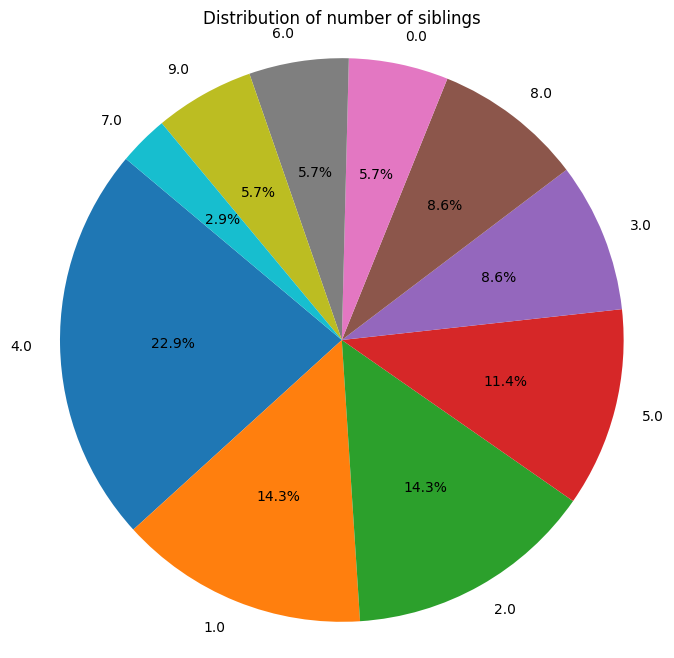

In [80]:
#Use pie chart for number of sibling distribution
number_siblings_counts=df['number_siblings'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(number_siblings_counts, labels=number_siblings_counts.index, autopct='%1.1f%%', startangle=140 )
plt.title('Distribution of number of siblings')
plt.axis('equal')
plt.show()